<hr style="border-width:2px;border-color:##75DFC1">
<center> <h1> Project </h1> </center> <br>
<center> <h2> Movie recommendation system  </h2> </center> <br>
<hr style="border-width:2px;border-color:##75DFC1">



*Description of the Project:*

Creation of a recommendation system:

*   collaborative filtering application
*   consolidation of a dataset by web scraping
*   application of Deep Learning algorithms.

Data Resources:


*   Notes available here: https://grouplens.org/datasets/movielens


Project Members: (alphabetically w.r.t. surnames)

*  Femke Lutz
*  Athoy Nilima
*  Clemens Schaab
*  Elvid Srebric

Dataset:

ml-latest-small

100,000 ratings and 3,600 tag applications applied to 9,000 movies by 600 users. Last updated 9/2018.



*Data Filees, ml-latest-small:*

*Movielens data*

From top directory 

*   Data/ml-latest-small/links.csv
*   Data/ml-latest-small/movies.csv
*   Data/ml-latest-small/ratings.csv
*   Data/ml-latest-small/tags.csv



> Preprocessed and Merged Data, according to the notebook DataCleaning_PreliminaryMerge_Athoy.ipynb:
> * Data/ml-latest-small/PreprocessedData_ml_latest_small.csv


# Preliminary

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import os
%pwd

'/Users/Shared/Work/BootCamp/Project/test/MovieRecommendation/Notebooks/SmallDataSet_Notebooks'

In [2]:
# Read the preprocessed Data into pandas dataframe
df=pd.read_csv("../../Data/ml-latest-small/PreprocessedData_ml_latest_small.csv",index_col=0)

In [3]:
df.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
 6   imdbId     100836 non-null  int64  
 7   tmdbId     100823 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


> No Null values.

# Analysis and Visualization of Important Variables

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

## Nan values, Duplicates and unwanted column management

In [6]:
df.isnull().sum()

userId        0
movieId       0
rating        0
timestamp     0
title         0
genres        0
imdbId        0
tmdbId       13
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
 6   imdbId     100836 non-null  int64  
 7   tmdbId     100823 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


> No Null values.

> For our recommendation System model, Irrelevant columns are imdbId and tmdbId
> instead of replacing nan values in tmdbId, just delete the columns imdbId, tmdbId

In [8]:
df=df.drop(['imdbId','tmdbId'],axis=1)

> do we have duplicates?

In [9]:
nb_rows_duplicated = df.duplicated().sum()

print("Number of rows duplicated :", nb_rows_duplicated)

Number of rows duplicated : 0


> No duplicates.

> Do we have different movieIds with same Movie Title?

In [10]:
print("We have",len(df['title'].unique()),"unique movie titles.")

We have 9719 unique movie titles.


In [11]:
print("We have",len(df['movieId'].unique()),"unique movie Ids.")

We have 9724 unique movie Ids.


> No. 


## Distribution of Genres

In [12]:
# Need to isolate separate words in genres

ListOfGenres=df['genres'].unique()
l=[]
for genreName in ListOfGenres:
    sep_names=genreName.split("|")
    l=l+sep_names

# drop duplicates (only works for Python3)
l=[*set(l)]

### Bar plot of number of ratings each genre received

In [13]:
NewList=[]

for genr in l:
  
  NewList.append(len(df[df['genres'].str.contains(genr)]))

/var/folders/x0/y7r22n7s1_5fk498dctvq4000000gn/T/ipykernel_20415/1663654598.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  NewList.append(len(df[df['genres'].str.contains(genr)]))


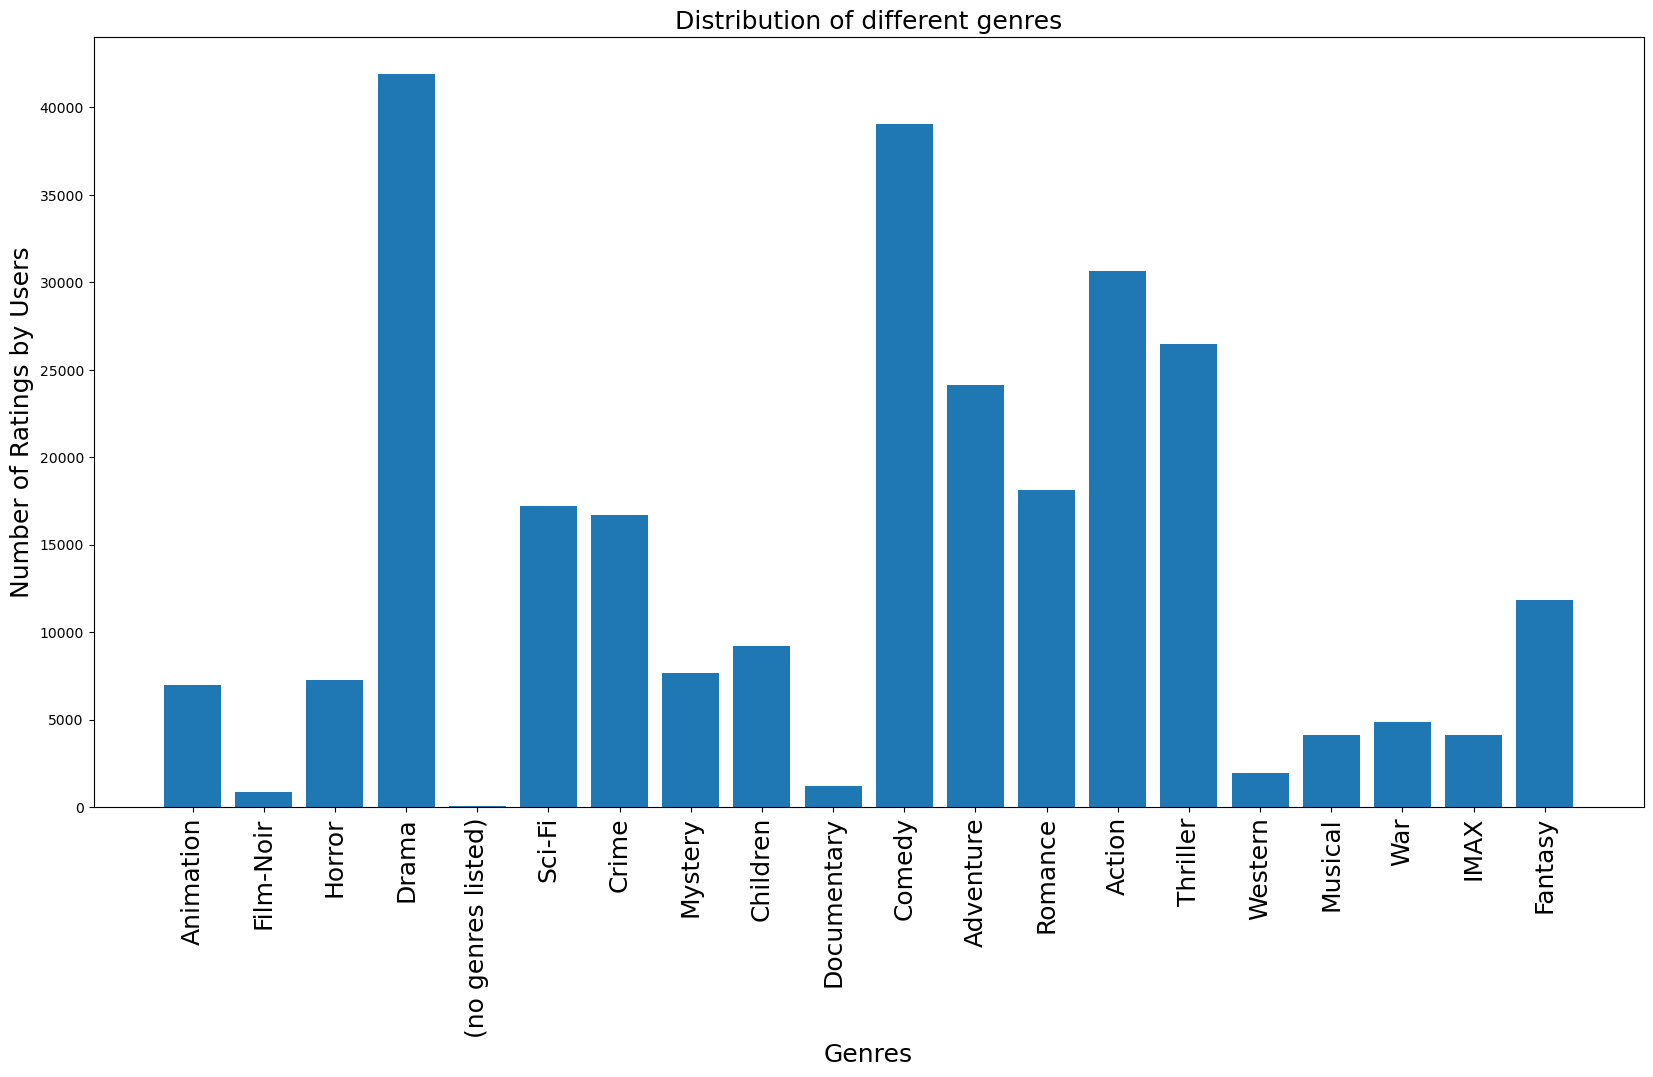

In [14]:
plt.figure(figsize=(20, 10))
plt.bar(l,NewList)
plt.xlabel('Genres',fontsize=18)
plt.ylabel('Number of Ratings by Users',fontsize=18)
plt.xticks(rotation = 90,fontsize=18)
plt.title("Distribution of different genres",fontsize=18)

plt.show()

> We see that Movies of type Drama got most user ratings.
> Also, we have an imbalanced dataset.

> Draw the same graph in Pie Chart

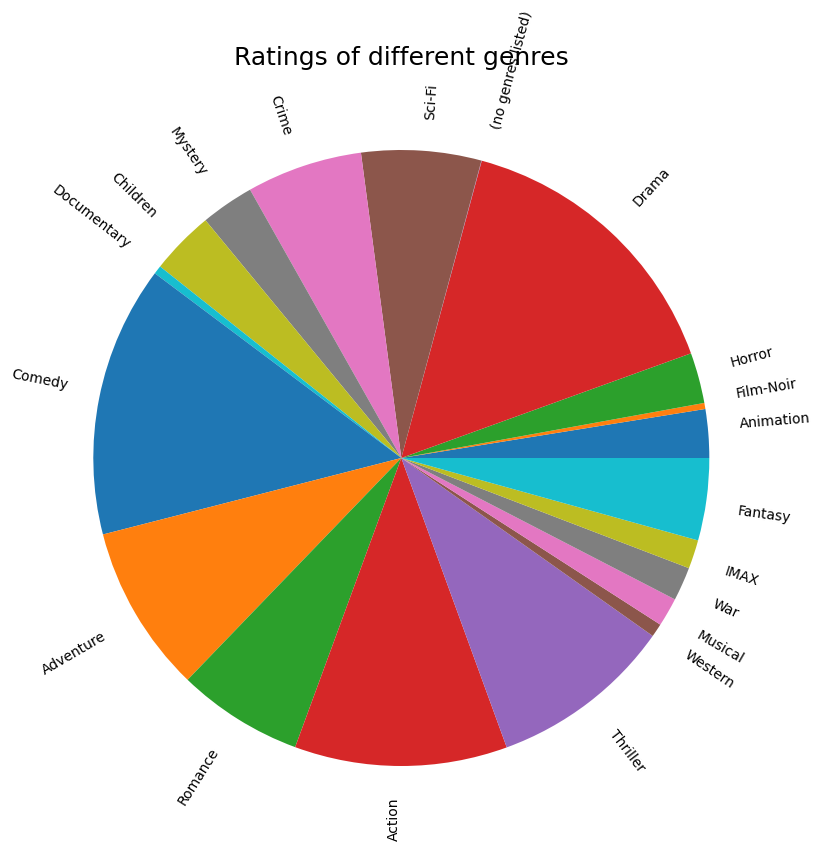

In [15]:

plt.figure(figsize=(20, 10))
plt.pie(NewList, labels=l, rotatelabels = True)

plt.title("Ratings of different genres",fontsize=18)
#plt.legend()

plt.show()

### Bar Plot of number of movies in the database from each genre

> We need to just count the movies, not user ratings (I mean we disregard how many times the movie is rated)

In [16]:
List_2=[]

for genr in l:
    #Rows with genre genr
    df_prelim=df[df['genres'].str.contains(genr)]
    #Number of unique movies 
    df_prelim_unique=df_prelim.movieId.unique()
    List_2.append(len(df_prelim_unique))

/var/folders/x0/y7r22n7s1_5fk498dctvq4000000gn/T/ipykernel_20415/2673360963.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_prelim=df[df['genres'].str.contains(genr)]


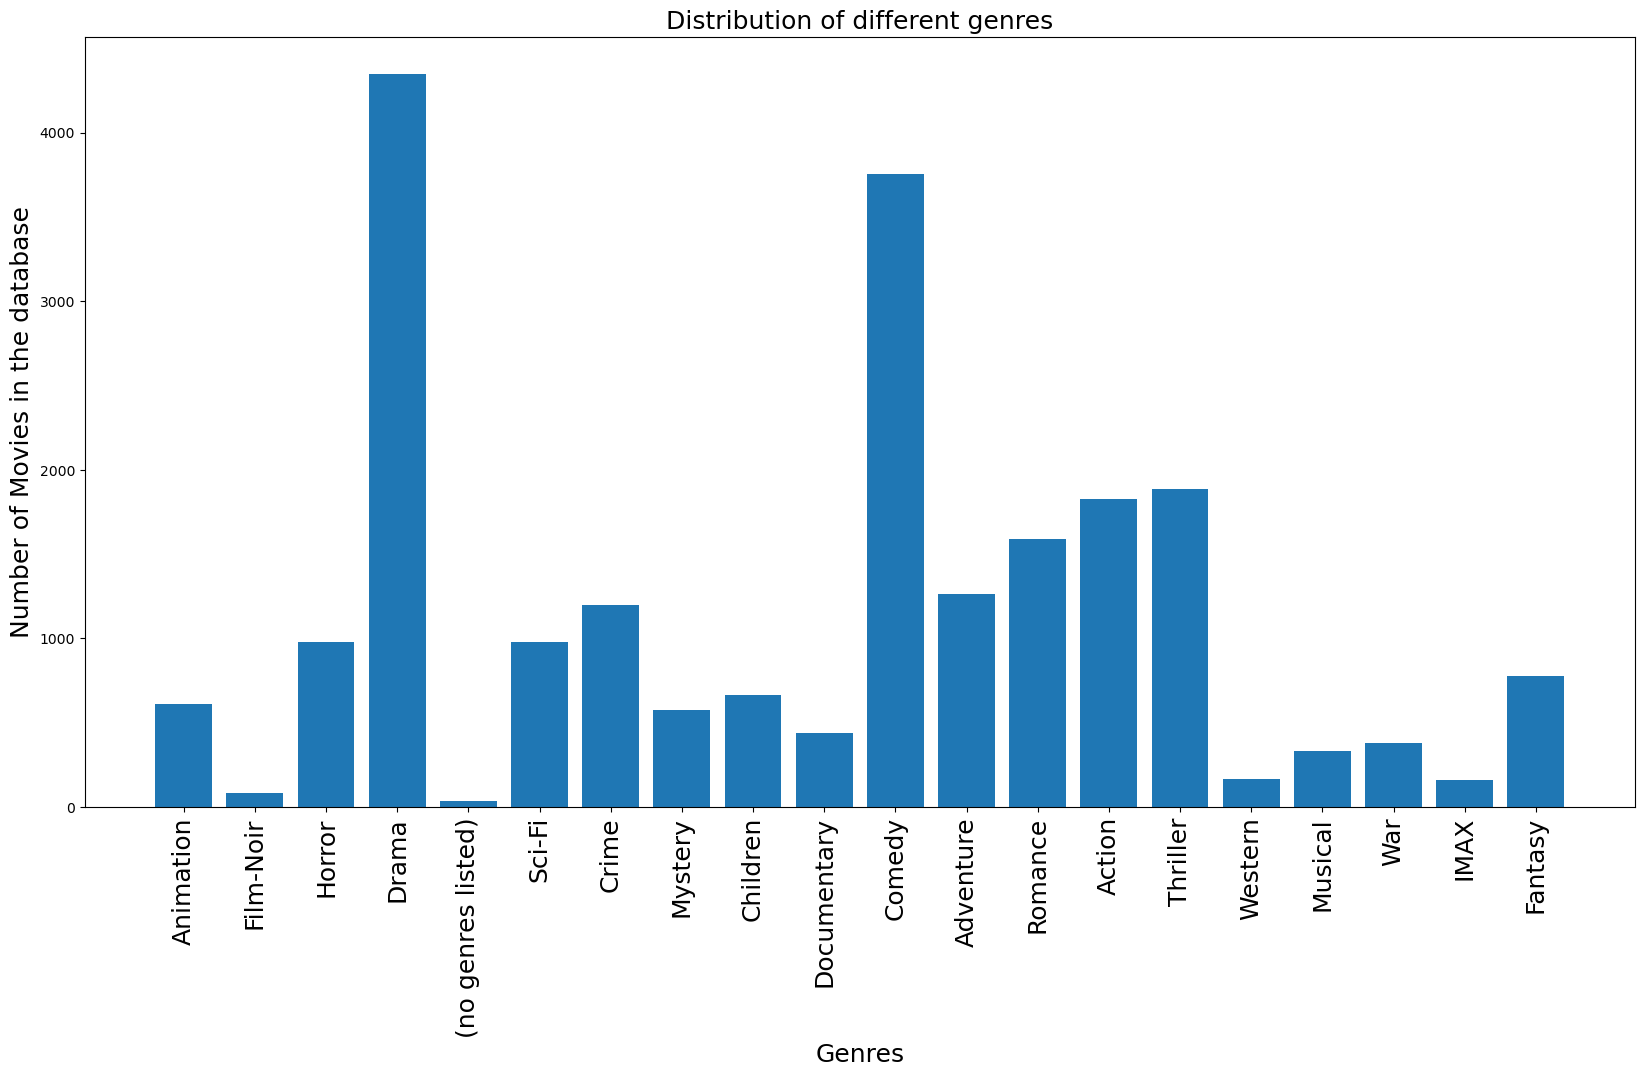

In [17]:
plt.figure(figsize=(20, 10))
plt.bar(l,List_2)
plt.xlabel('Genres',fontsize=18)
plt.ylabel('Number of Movies in the database',fontsize=18)
plt.xticks(rotation = 90,fontsize=18)
plt.title("Distribution of different genres",fontsize=18)

plt.show()

> We see that majority of Movies are of type Drama
> Also, we have an imbalanced dataset.

> Draw the same graph in Pie Chart

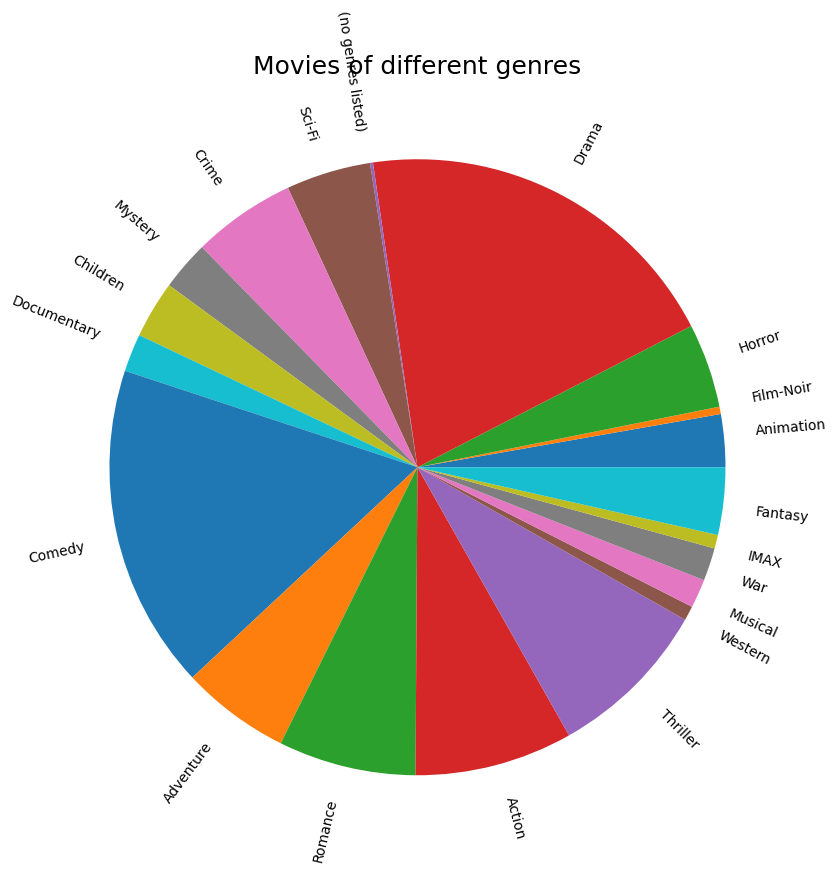

In [18]:

plt.figure(figsize=(20, 10))
plt.pie(List_2, labels=l, rotatelabels = True)

plt.title("Movies of different genres",fontsize=18)
#plt.legend()

plt.show()